# 제주공항 이용자수 분석

In [9]:
import pandas as pd #분석 최적화
import matplotlib
import matplotlib.pyplot as plt # 그래프 분석 위해 사용
import matplotlib.font_manager as fm  # 글꼴

file_path = "./ref/출입국내외국인성별국제이동연간20250305.csv"  #파일 불러오기
ori = pd.read_csv(file_path, encoding="EUC-KR")  # 우분투는 인코딩 생략가능
ori.tail()  #하위 5개 행 추출

,출입국항별,내외국인별,성별,시점,항목,데이터
75,제주,외국인,여자,2021,출국자,1601
76,제주,외국인,여자,2022,입국자,422
77,제주,외국인,여자,2022,출국자,774
78,제주,외국인,여자,2023,입국자,3709
79,제주,외국인,여자,2023,출국자,1926


In [10]:
ex1_data = ori.copy()
ex1_data.columns = ["airport","type1","gender","year","type2","value"]   # 칼럼 이름변경
#ex1_data.rename(columns={"",""})
ex1_data

,airport,type1,gender,year,type2,value
0,제주,내국인,남자,2014,입국자,282
1,제주,내국인,남자,2014,출국자,201
2,제주,내국인,남자,2015,입국자,292
3,제주,내국인,남자,2015,출국자,210
4,제주,내국인,남자,2016,입국자,388
...,...,...,...,...,...,...
75,제주,외국인,여자,2021,출국자,1601
76,제주,외국인,여자,2022,입국자,422
77,제주,외국인,여자,2022,출국자,774
78,제주,외국인,여자,2023,입국자,3709


In [11]:
filter1 = ex1_data['type1'] == '내국인'    #내국인인 항목만 추출
ex2_data = ex1_data[filter1].copy()
ex2_data

,airport,type1,gender,year,type2,value
0,제주,내국인,남자,2014,입국자,282
1,제주,내국인,남자,2014,출국자,201
2,제주,내국인,남자,2015,입국자,292
3,제주,내국인,남자,2015,출국자,210
4,제주,내국인,남자,2016,입국자,388
5,제주,내국인,남자,2016,출국자,275
6,제주,내국인,남자,2017,입국자,412
7,제주,내국인,남자,2017,출국자,208
8,제주,내국인,남자,2018,입국자,575
9,제주,내국인,남자,2018,출국자,339


In [12]:
ex1_data = ex1_data.groupby('year')['value'].sum().reset_index(name='total') #그룹화된 내국인 데이터 계산
ex1_data.head()

,year,total
0,2014,5969
1,2015,9772
2,2016,13720
3,2017,18134
4,2018,23869


In [13]:
filter2 = ex2_data['type2'] == '입국자'  #입국자인 데이터만 필터링
ex2_filtered = ex2_data[filter2]
filter3 = ex2_data['type2'] == '출국자'  #출국자인 데이터만 필터링
ex3_filtered = ex2_data[filter3]
ex2_data = ex2_filtered.groupby('year')['value'].sum().reset_index(name='total') 
ex3_data = ex3_filtered.groupby('year')['value'].sum().reset_index(name='total')

In [14]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
fontlist = fm.findSystemFonts(fontpaths=None, fontext='ttf')

Text(0.3, 0.3, '한글')

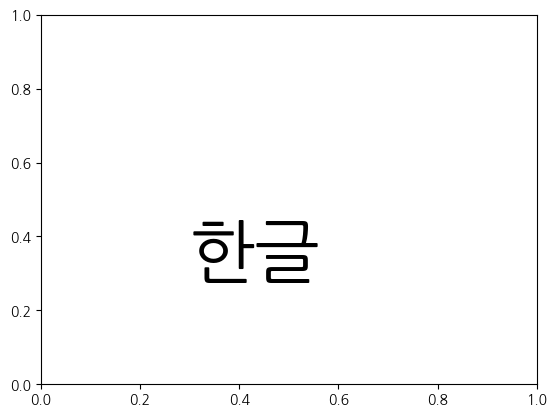

In [15]:
path =  'C:\\Windows\\Fonts\\NanumGothic.ttf'      #글꼴 경로
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.3,0.3,'한글',size=50)

<Axes: title={'center': '2014~2023년 인천공항 입국차트'}>

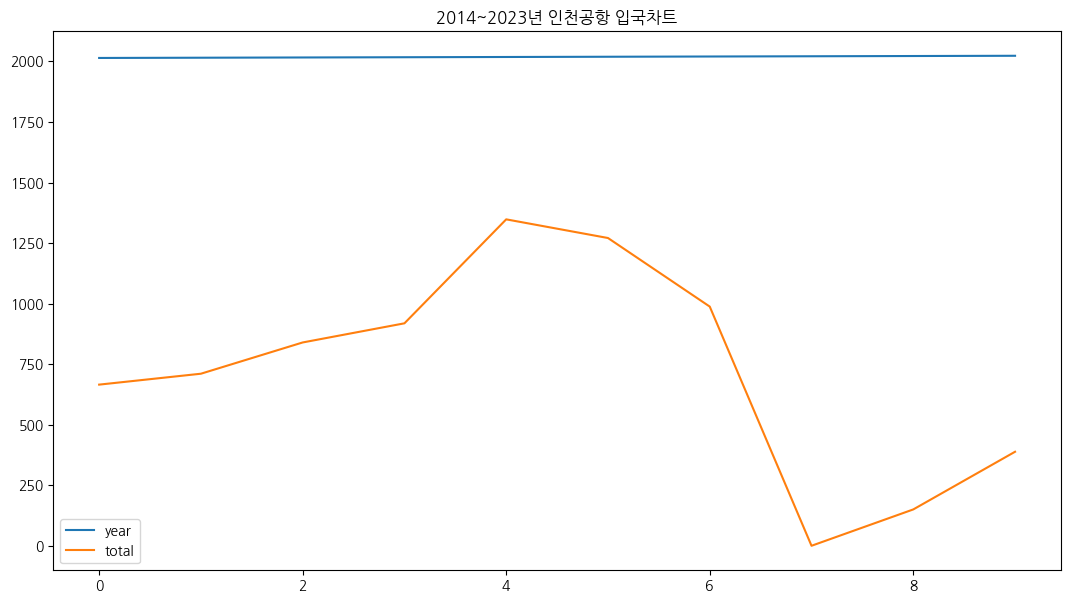

In [17]:
ex2_data.plot(figsize=(13,7),title="2014~2023년 인천공항 입국차트")

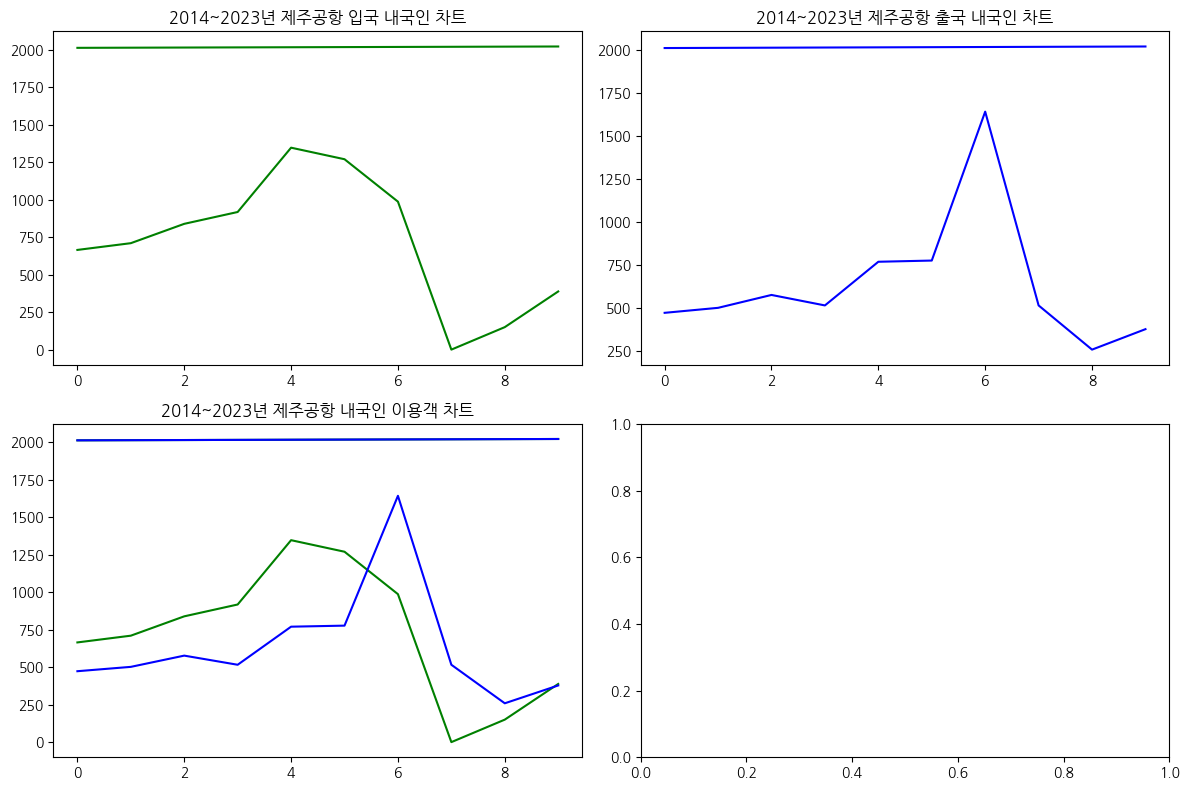

In [29]:
import matplotlib.pyplot as plt

fig , axs = plt.subplots(2,2,figsize=(12,8))  #가로2개 세로2개인 표 생성

axs[0,0].plot(ex2_data, color="g")   #1번째 자리에 그래프 추가, 색은 초록
axs[0,1].plot(ex3_data, color="b")   #2번째 자리에 그래프 추가, 색은 파랑
axs[1,0].plot(ex2_data, color="g")   #3번째 자리에 출국 입국 합친 그래프 추가
axs[1,0].plot(ex3_data, color="b")
axs[0,0].set_title("2014~2023년 제주공항 입국 내국인 차트")    #각 그래프의 제목
axs[0,1].set_title("2014~2023년 제주공항 출국 내국인 차트")
axs[1,0].set_title("2014~2023년 제주공항 내국인 이용객 차트")

plt.tight_layout()
plt.show()

최근 10년 간 제주공항 내국인 이용객 수를 보면 2020년에 그래프가 0에 가깝다는 것을 볼 수 있음.
이는 코로나의 여파로 항공기 이용 제한에 따라 승객 수가 없었다고 볼 수 있음.
팬데믹이 끝난 시점부터 그래프가 우상향 되는 것을 볼 수 있고 계속 증가할 것으로 예상됨